In [276]:
# Install libraries
!pip install numpy
!pip install pandas

In [277]:
# Install sckit-learn
!pip install scikit-learn

Below cell usually comes with kaggle notebook. It helps us to identify the files

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/updated-cancer-data/cancer patient data sets updated.csv
/kaggle/input/cancer/cancer patient data sets.csv


In [22]:
# Load our dataset
# Note that this is an updated version of the dataset mentioned below
# https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link
data_df = pd.read_csv('/kaggle/input/updated-cancer-data/cancer patient data sets updated.csv')

In [4]:
# Shape of the dataframe
data_df.shape

(1000, 26)

In [5]:
# Data (First 10 rows)
data_df.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4.0,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,NaN,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,15.0,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,NaN,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,NaN,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5.0,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4.0,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1.0,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5.0,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3.0,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


## Visualize Data

/tmp/ipykernel_33/4262337657.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_df.hist(ax = ax, layout=(6,4))


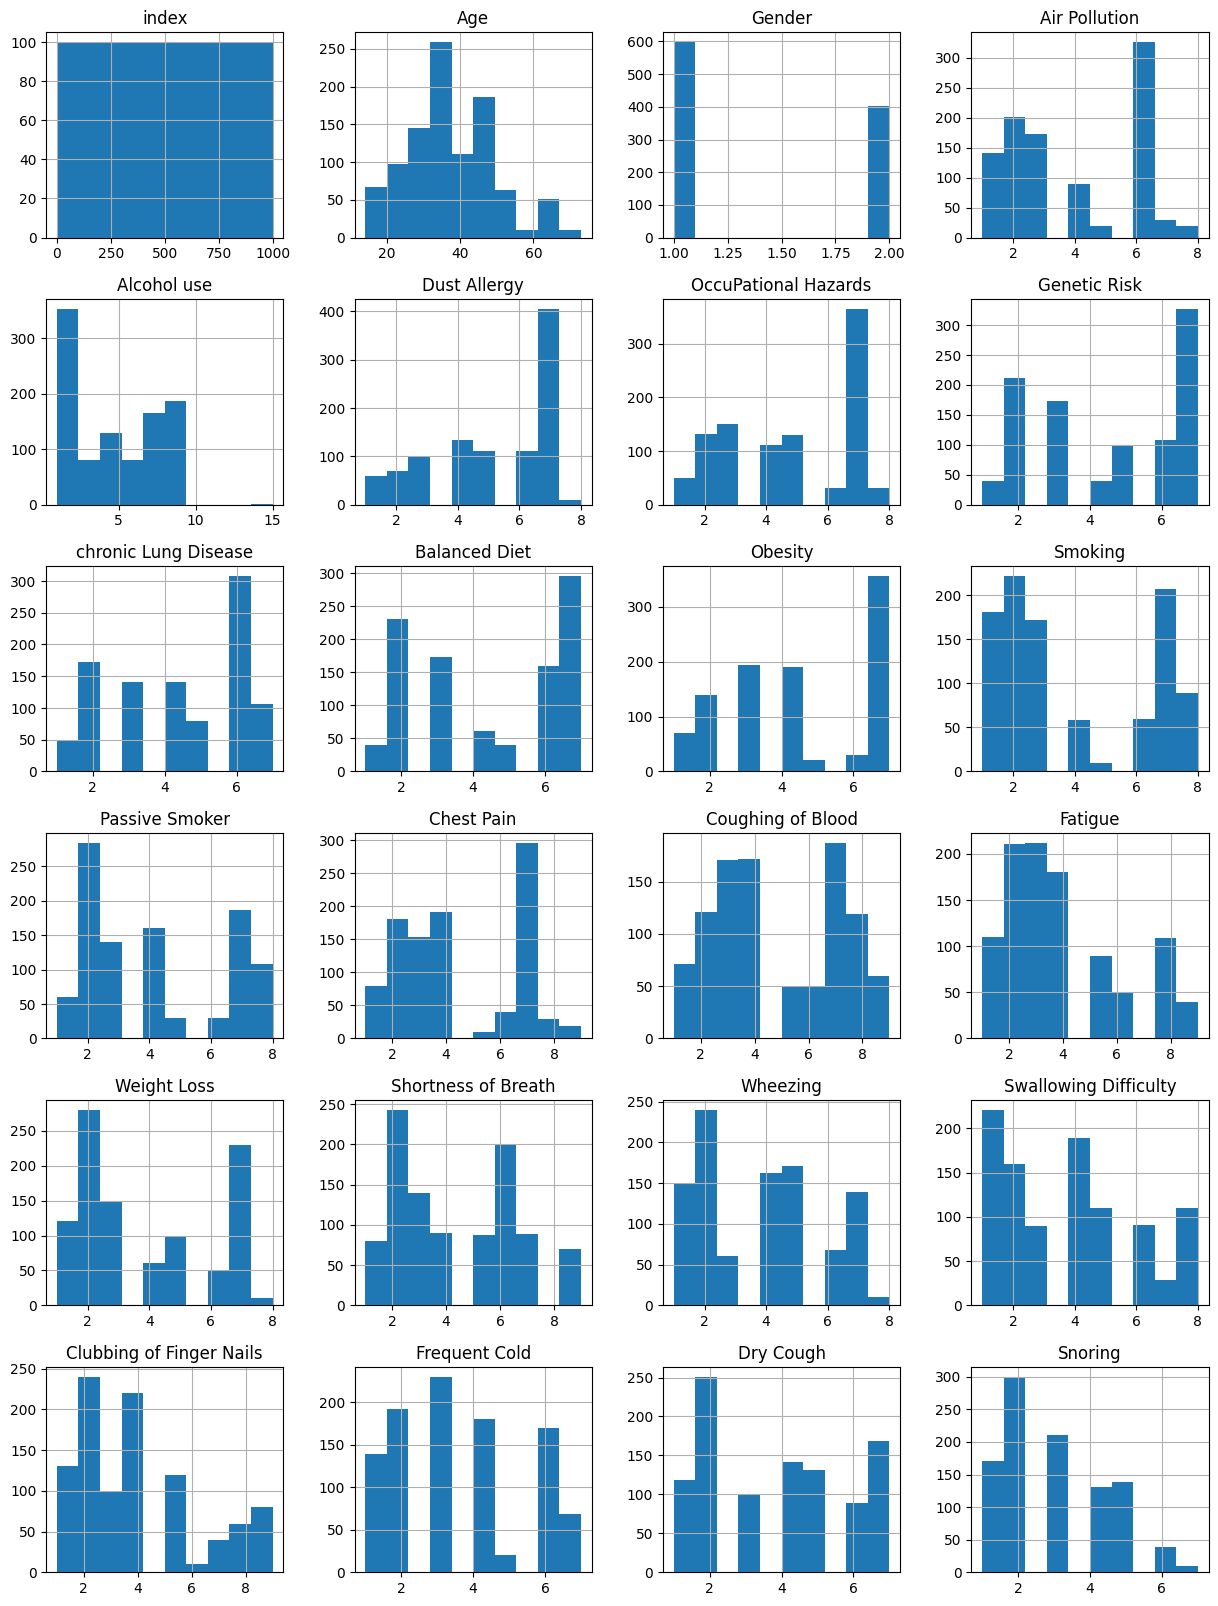

In [10]:
# Plot the histogram
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data_df.hist(ax = ax, layout=(6,4)) 
plt.show()

/tmp/ipykernel_33/2069380029.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_df.plot(ax = ax, kind='box', subplots=True, layout=(6,4), sharex=False)


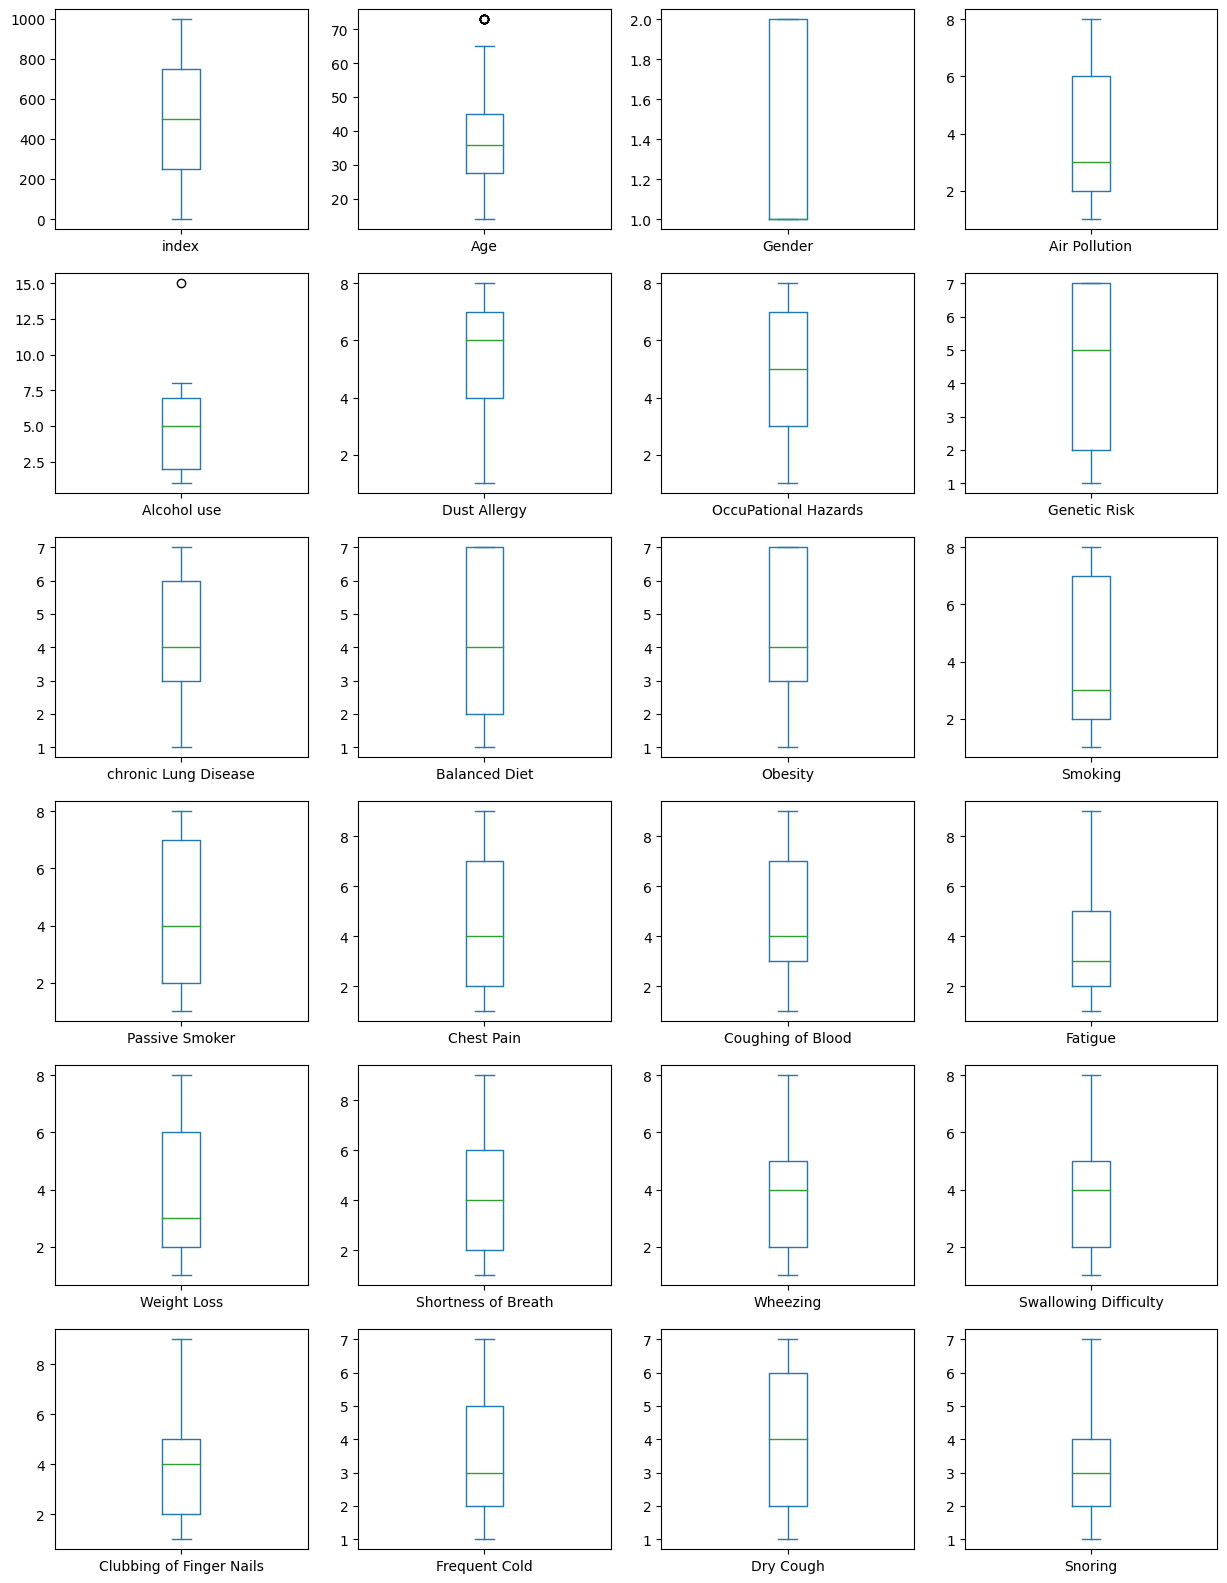

In [ ]:
# Plot with different types of plots to understand the dataset
# In the example I have used density plot
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data_df.plot(ax = ax, kind='box', subplots=True, layout=(6,4), sharex=False)
plt.show()

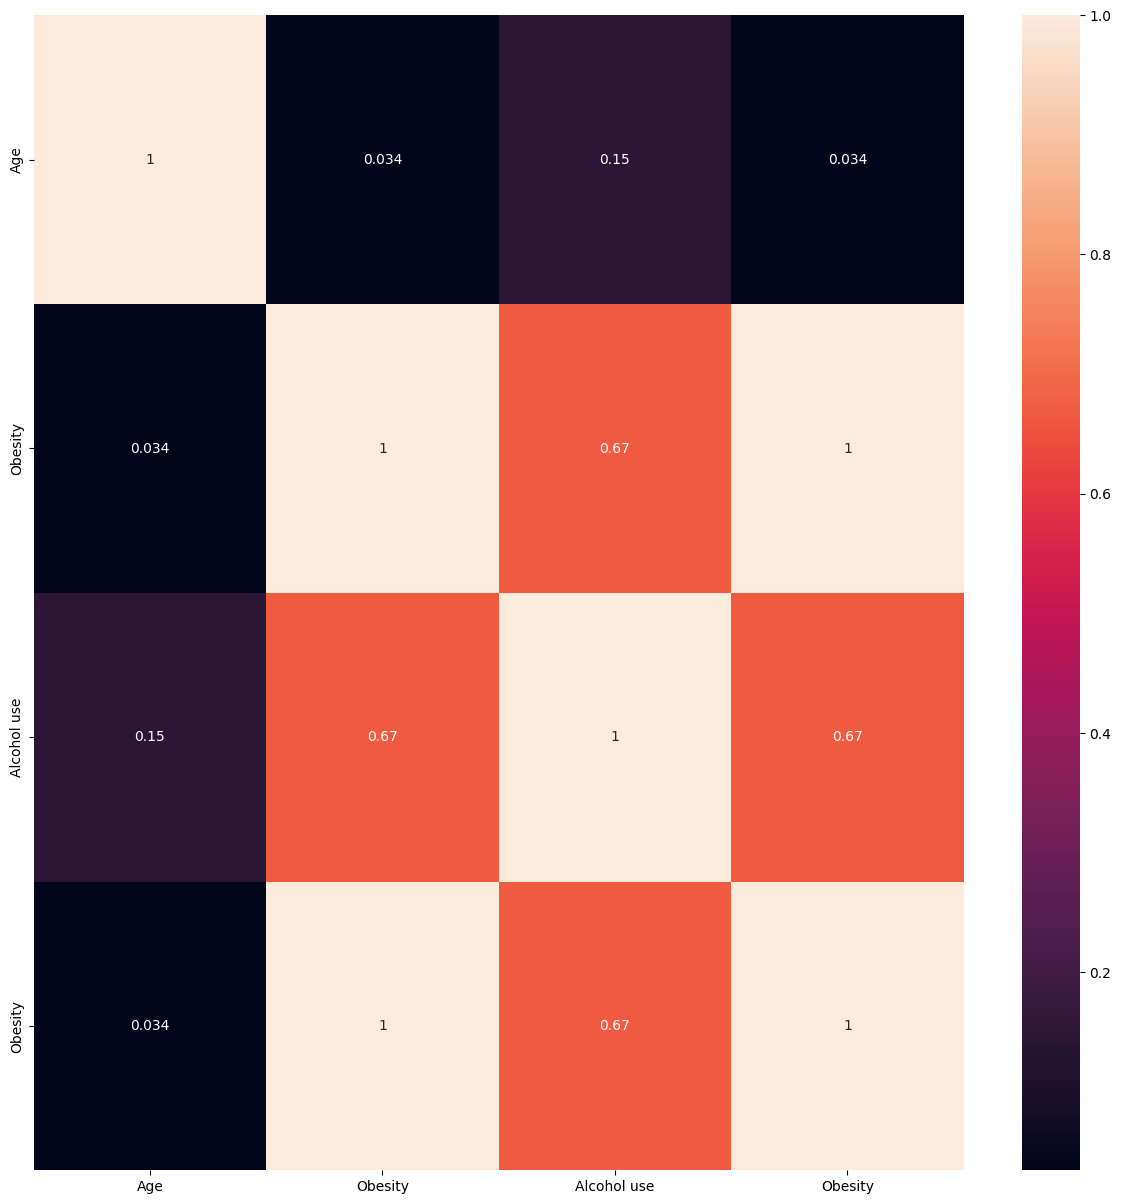

In [11]:
# Plot using Seaborn for visualizing correlation of each parameters
import seaborn as sb
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
correlations = data_df[['Age','Obesity', 'Alcohol use', 'Obesity']].corr(method='pearson')
sb.heatmap(correlations, annot=True, ax=ax)

plt.show()

## Data Cleaning
### 1. Finding non values 

In [12]:
# Method 1 : sum the null cells in each column
data_df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 3
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [13]:
# Method 2 : information of the all parameters
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1000 non-null   int64  
 1   Patient Id                1000 non-null   object 
 2   Age                       1000 non-null   int64  
 3   Gender                    1000 non-null   int64  
 4   Air Pollution             1000 non-null   int64  
 5   Alcohol use               997 non-null    float64
 6   Dust Allergy              1000 non-null   int64  
 7   OccuPational Hazards      1000 non-null   int64  
 8   Genetic Risk              1000 non-null   int64  
 9   chronic Lung Disease      1000 non-null   int64  
 10  Balanced Diet             1000 non-null   int64  
 11  Obesity                   1000 non-null   int64  
 12  Smoking                   1000 non-null   int64  
 13  Passive Smoker            1000 non-null   int64  
 14  Chest Pai

In [298]:
# Drop null values
data_new = data_df.dropna()

In [299]:
data_new.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4.0,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
2,2,P100,35,1,4,15.0,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
5,5,P102,35,1,4,5.0,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4.0,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1.0,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5.0,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3.0,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium
10,10,P107,44,1,6,7.0,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
11,11,P108,64,2,6,8.0,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
12,12,P109,39,2,4,5.0,6,6,5,4,...,5,3,2,4,3,1,7,5,6,Medium


### 2. Remove Duplicates

In [14]:
# Find duplicates 
data_df.duplicated().sum()

0

In [15]:
# Remove duplicates
data_dup = data_df.drop_duplicates()

In [16]:
# Visualize the dataframe without duplicates
data_dup.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4.0,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,NaN,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,15.0,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,NaN,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,NaN,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5.0,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4.0,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1.0,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5.0,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3.0,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


### 3. Identify and remove irrelavant data

In [17]:
# Statistics of the dataset
data_df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,997.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.570712,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.639343,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,15.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [18]:
# Data type conversion (if want)
data_df["Obesity"] = data_df["Obesity"].astype(int)

In [19]:
# Updated data frame
data_df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4.0,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,NaN,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,15.0,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,NaN,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,NaN,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [20]:
# Inter Quatile Range Method
Q1 = data_df["Alcohol use"].quantile(0.25)
Q3 = data_df["Alcohol use"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_df = data_df[data_df["Alcohol use"].between(lower_bound,upper_bound)]
data_df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4.0,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
5,5,P102,35,1,4,5.0,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4.0,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1.0,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5.0,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7.0,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8.0,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5.0,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8.0,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### 4. Handling Missing Data


In [24]:
# Replace with mean
data_df.loc[:, "Alcohol use mean"] = data_df["Alcohol use"].fillna(data_df["Alcohol use"].mean())
data_df.head(10)

# New coloumn have been added at the end with replacing the column mean for missing values

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Alcohol use mean
0,0,P1,33,1,2,4.0,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,4.000000
1,1,P10,17,1,3,NaN,5,3,4,2,...,3,7,8,6,2,1,7,2,Medium,4.570712
2,2,P100,35,1,4,15.0,6,5,5,4,...,7,9,2,1,4,6,7,2,High,15.000000
3,3,P1000,37,1,7,NaN,7,7,6,7,...,2,3,1,4,5,6,7,5,High,4.570712
4,4,P101,46,1,6,NaN,7,7,7,6,...,2,4,1,4,2,4,2,3,High,4.570712
5,5,P102,35,1,4,5.0,6,5,5,4,...,7,9,2,1,4,6,7,2,High,5.000000
6,6,P103,52,2,2,4.0,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,4.000000
7,7,P104,28,2,3,1.0,4,3,2,3,...,2,2,4,2,2,3,4,3,Low,1.000000
8,8,P105,35,2,4,5.0,6,5,6,5,...,4,3,2,4,6,2,4,1,Medium,5.000000
9,9,P106,46,1,2,3.0,4,2,4,3,...,2,4,6,5,4,2,1,5,Medium,3.000000


## Data Preprocessing

### 1. Scaling

In [30]:
# Min-max Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

array = data_df[["Alcohol use mean"]]
array_transform = scaler.fit_transform(array)
data_df["Alcohol use transform"] = array_transform

In [31]:
# Visualize the scaled version of Alcohol use mean column
data_df.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Alcohol use mean,Alcohol use transform,Alcohol transform
0,0,P1,33,1,2,4.0,5,4,3,2,...,2,3,1,2,3,4,Low,4.000000,0.214286,-0.216666
1,1,P10,17,1,3,NaN,5,3,4,2,...,8,6,2,1,7,2,Medium,4.570712,0.255051,0.000000
2,2,P100,35,1,4,15.0,6,5,5,4,...,2,1,4,6,7,2,High,15.000000,1.000000,3.959399
3,3,P1000,37,1,7,NaN,7,7,6,7,...,1,4,5,6,7,5,High,4.570712,0.255051,0.000000
4,4,P101,46,1,6,NaN,7,7,7,6,...,1,4,2,4,2,3,High,4.570712,0.255051,0.000000
5,5,P102,35,1,4,5.0,6,5,5,4,...,2,1,4,6,7,2,High,5.000000,0.285714,0.162976
6,6,P103,52,2,2,4.0,5,4,3,2,...,2,3,1,2,3,4,Low,4.000000,0.214286,-0.216666
7,7,P104,28,2,3,1.0,4,3,2,3,...,4,2,2,3,4,3,Low,1.000000,0.000000,-1.355593
8,8,P105,35,2,4,5.0,6,5,6,5,...,2,4,6,2,4,1,Medium,5.000000,0.285714,0.162976
9,9,P106,46,1,2,3.0,4,2,4,3,...,6,5,4,2,1,5,Medium,3.000000,0.142857,-0.596309


In [27]:
# Standardlization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

array = data_df[["Alcohol use mean"]]
array_transform = scaler.fit_transform(array)
data_df["Alcohol use transform"] = array_transform

In [28]:
# Visualize the scaled version of Alcohol use mean column
data_df.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Alcohol use mean,Alcohol use transform
0,0,P1,33,1,2,4.0,5,4,3,2,...,2,2,3,1,2,3,4,Low,4.000000,-0.216666
1,1,P10,17,1,3,NaN,5,3,4,2,...,7,8,6,2,1,7,2,Medium,4.570712,0.000000
2,2,P100,35,1,4,15.0,6,5,5,4,...,9,2,1,4,6,7,2,High,15.000000,3.959399
3,3,P1000,37,1,7,NaN,7,7,6,7,...,3,1,4,5,6,7,5,High,4.570712,0.000000
4,4,P101,46,1,6,NaN,7,7,7,6,...,4,1,4,2,4,2,3,High,4.570712,0.000000
5,5,P102,35,1,4,5.0,6,5,5,4,...,9,2,1,4,6,7,2,High,5.000000,0.162976
6,6,P103,52,2,2,4.0,5,4,3,2,...,2,2,3,1,2,3,4,Low,4.000000,-0.216666
7,7,P104,28,2,3,1.0,4,3,2,3,...,2,4,2,2,3,4,3,Low,1.000000,-1.355593
8,8,P105,35,2,4,5.0,6,5,6,5,...,3,2,4,6,2,4,1,Medium,5.000000,0.162976
9,9,P106,46,1,2,3.0,4,2,4,3,...,4,6,5,4,2,1,5,Medium,3.000000,-0.596309


In [29]:
# Normalizer
from sklearn import preprocessing as pp
normalizer = pp.Normalizer(norm = 'l2')

alcohol_array = data_df[["Alcohol use mean"]]
alcohol_array_transform = scaler.transform(alcohol_array)
data_df['Alcohol transform'] = alcohol_array_transform

# Visualize the scaled version of Alcohol use mean column
data_df.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Alcohol use mean,Alcohol use transform,Alcohol transform
0,0,P1,33,1,2,4.0,5,4,3,2,...,2,3,1,2,3,4,Low,4.000000,-0.216666,-0.216666
1,1,P10,17,1,3,NaN,5,3,4,2,...,8,6,2,1,7,2,Medium,4.570712,0.000000,0.000000
2,2,P100,35,1,4,15.0,6,5,5,4,...,2,1,4,6,7,2,High,15.000000,3.959399,3.959399
3,3,P1000,37,1,7,NaN,7,7,6,7,...,1,4,5,6,7,5,High,4.570712,0.000000,0.000000
4,4,P101,46,1,6,NaN,7,7,7,6,...,1,4,2,4,2,3,High,4.570712,0.000000,0.000000
5,5,P102,35,1,4,5.0,6,5,5,4,...,2,1,4,6,7,2,High,5.000000,0.162976,0.162976
6,6,P103,52,2,2,4.0,5,4,3,2,...,2,3,1,2,3,4,Low,4.000000,-0.216666,-0.216666
7,7,P104,28,2,3,1.0,4,3,2,3,...,4,2,2,3,4,3,Low,1.000000,-1.355593,-1.355593
8,8,P105,35,2,4,5.0,6,5,6,5,...,2,4,6,2,4,1,Medium,5.000000,0.162976,0.162976
9,9,P106,46,1,2,3.0,4,2,4,3,...,6,5,4,2,1,5,Medium,3.000000,-0.596309,-0.596309


### 3. Encoding

In [32]:
# One hot encoder for binary representation of data
encoder = pp.OneHotEncoder()
array = data_df[['Level']].values
encoder.fit(array.ravel().reshape(-1,1)) # ravel() converts 1d vector to array
array_encoded = encoder.transform(array)
array_encoded

<1000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [33]:
# Label encoder to integer representation of labels
encoder = pp.LabelEncoder()
array = data_df[['Level']].values
encoder.fit(array.ravel()) # ravel() converts 1d vector to array
array_encoded = encoder.transform(array)
data_df['Level encoded'] = array_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [34]:
# Visualize the scaled version of Alcohol use mean column
data_df.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Alcohol use mean,Alcohol use transform,Alcohol transform,Level encoded
0,0,P1,33,1,2,4.0,5,4,3,2,...,3,1,2,3,4,Low,4.000000,0.214286,-0.216666,1
1,1,P10,17,1,3,NaN,5,3,4,2,...,6,2,1,7,2,Medium,4.570712,0.255051,0.000000,2
2,2,P100,35,1,4,15.0,6,5,5,4,...,1,4,6,7,2,High,15.000000,1.000000,3.959399,0
3,3,P1000,37,1,7,NaN,7,7,6,7,...,4,5,6,7,5,High,4.570712,0.255051,0.000000,0
4,4,P101,46,1,6,NaN,7,7,7,6,...,4,2,4,2,3,High,4.570712,0.255051,0.000000,0
5,5,P102,35,1,4,5.0,6,5,5,4,...,1,4,6,7,2,High,5.000000,0.285714,0.162976,0
6,6,P103,52,2,2,4.0,5,4,3,2,...,3,1,2,3,4,Low,4.000000,0.214286,-0.216666,1
7,7,P104,28,2,3,1.0,4,3,2,3,...,2,2,3,4,3,Low,1.000000,0.000000,-1.355593,1
8,8,P105,35,2,4,5.0,6,5,6,5,...,4,6,2,4,1,Medium,5.000000,0.285714,0.162976,2
9,9,P106,46,1,2,3.0,4,2,4,3,...,5,4,2,1,5,Medium,3.000000,0.142857,-0.596309,2


### 3. Spliting


In [35]:
# Split to train, test
from sklearn.model_selection import train_test_split

# Extract the features and the predictor as arrays
dataY = data_df.iloc[0:,29].values
dataX = data_df.iloc[0:,[2,3,4] + list(range(6, 24)) + list(range(27, 28))].values 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 22) (300, 22) (700,) (300,)


## Feature Engineering

### 1. Univariate feature selection

In [38]:
import pandas as pd
import numpy as np
import sklearn.feature_selection as fs
from sklearn.feature_selection import chi2

# Extract the features and the predictor as arrays
dataY = data_df.iloc[0:,29].values
dataX = data_df.iloc[0:,[2,3,4] + list(range(6, 24)) + list(range(27, 28))].values 

In [39]:
# Select Best 5 features
selector = fs.SelectKBest(score_func=chi2, k=5) # Change the k value as you desire to get the number of features
result = selector.fit(dataX, dataY)
best_features = result.transform(dataX)

In [42]:
# Display the output
np.set_printoptions(precision=2)
print("Column headers:", data_df.iloc[0:,[2,3,4] + list(range(6, 24)) + list(range(27, 28))].columns)
print(sorted(result.scores_))
# Compare the column values and score get the best features

Column headers: Index(['Age', 'Gender', 'Air Pollution', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Alcohol use transform'],
      dtype='object')
[4.668164778741005, 44.18720190087567, 71.69554092968866, 113.07424926209458, 152.0295469828671, 192.7132757444733, 201.42618929952533, 206.6665628100554, 257.9076792181332, 302.396156686843, 330.8807087684511, 401.0408830692596, 415.68565442569525, 488.6497258953134, 518.6315329755657, 518.9004462647205, 524.4895211052152, 588.9337428961087, 671.0062531127054, 712.0875622310214, 752.9597913577139, 818.6688836857342]


### 2. Recursive Feature Elimination (RFE)

In [45]:
import sklearn.linear_model as lm
from sklearn.feature_selection import RFE

In [46]:
reg_model = lm.LogisticRegression(max_iter=10000)
rfe = RFE(reg_model, n_features_to_select=5)
fit = rfe.fit(dataX, dataY.ravel())

In [47]:
# View the Results
# Selected features are assigned rank 1
ranks = rfe.ranking_
features = data_df.iloc[0:,2:24].columns

# Display feature with rank 1
for a, b in zip(ranks, features):
    if a == 1:
        print(f'{a}: {b}')

1: Balanced Diet
1: Smoking
1: Chest Pain
1: Coughing of Blood
1: Shortness of Breath
